TAREFA
- Crie um jupyter notebook com os imports necessários e um código para gerar os
gráficos referentes a base de dados de março, abril, maio, junho e dezembro
(numa célula só ou em várias).
- Como que você poderia fazer para deixar isso mais automatizado? Descreva na
última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos
pros meses/anos seguintes.

c:\Users\AlexSA\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


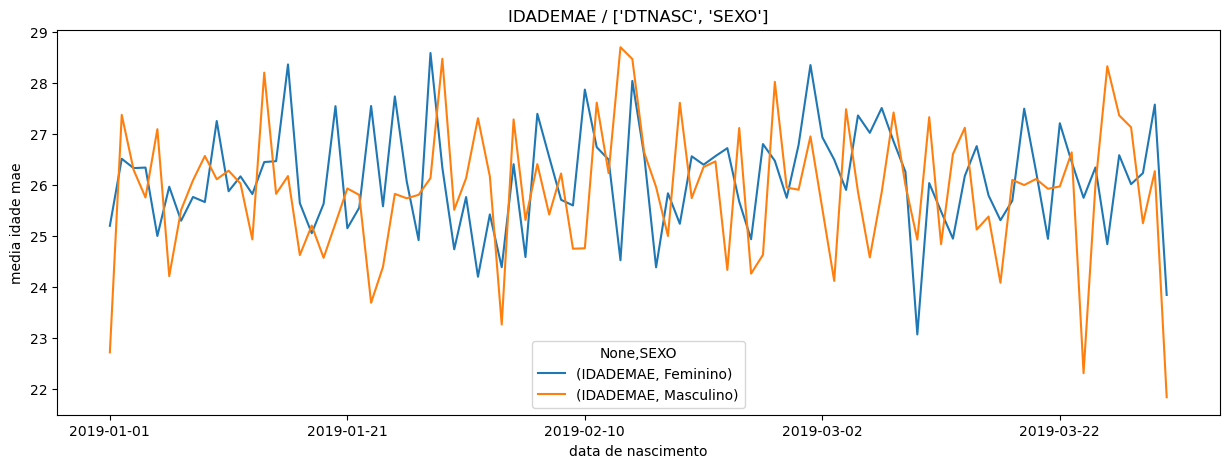

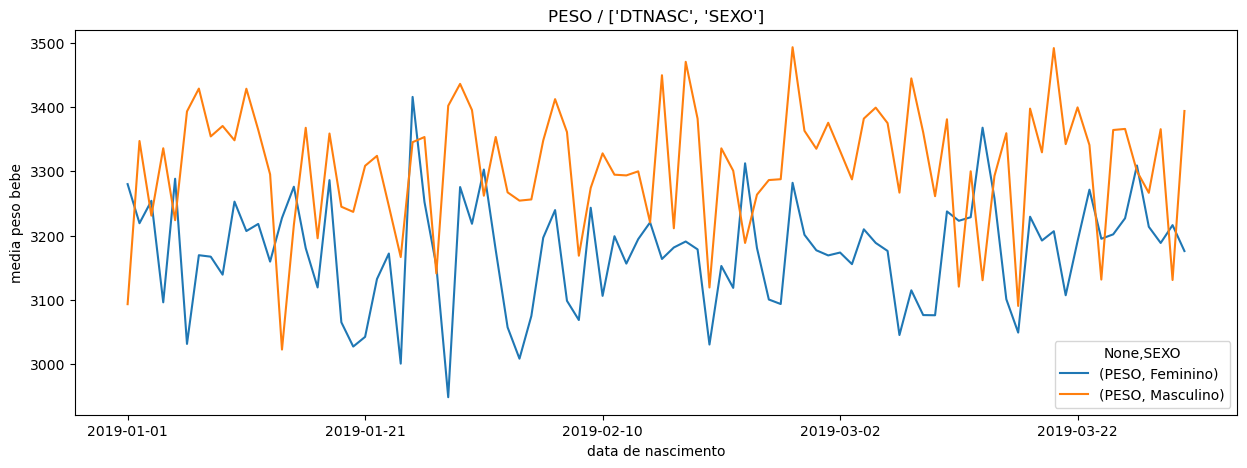

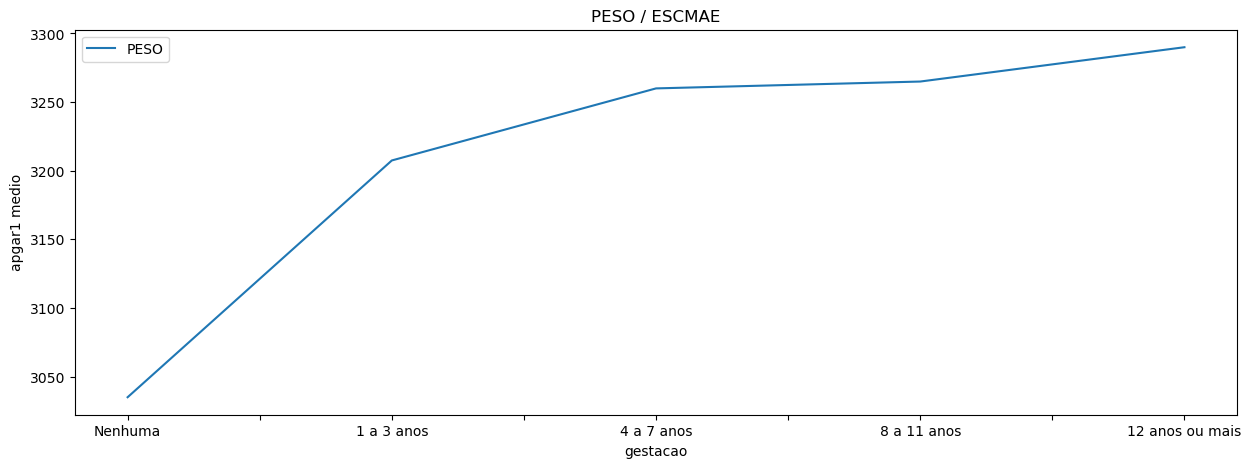

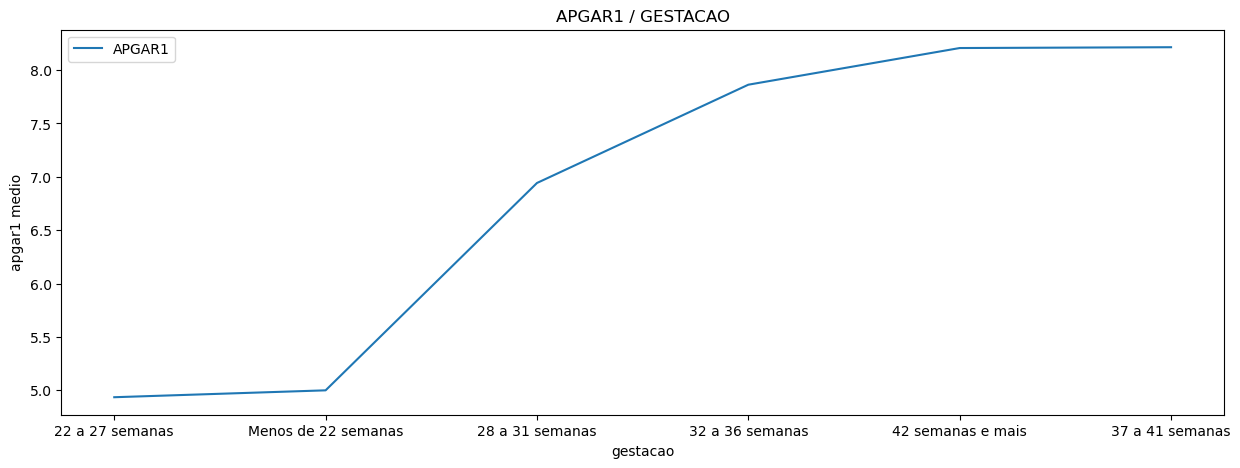

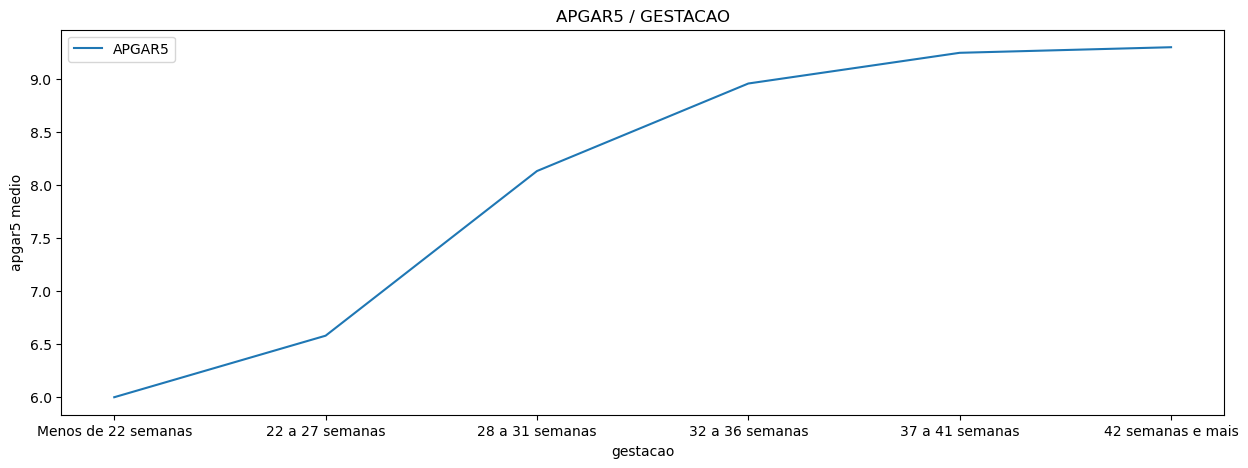

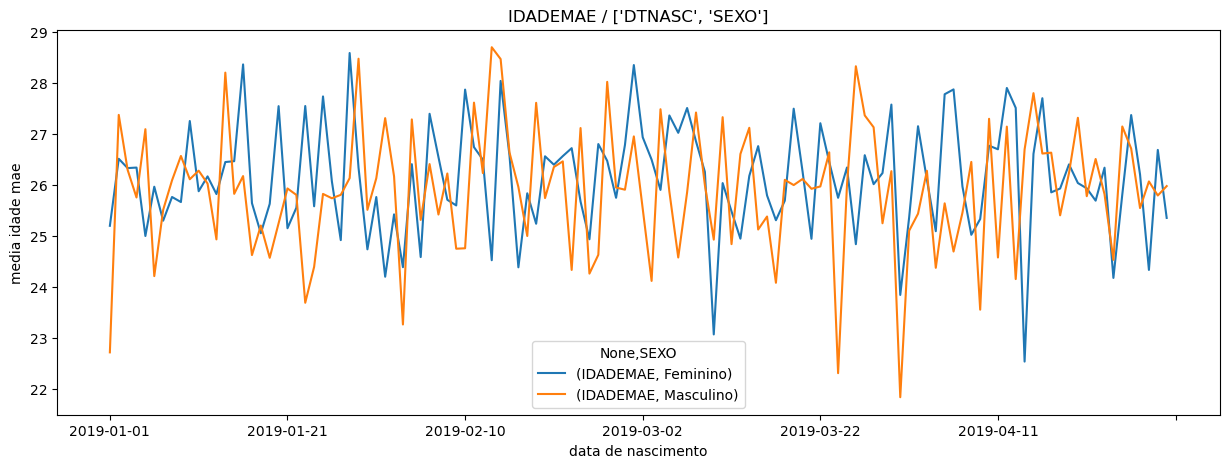

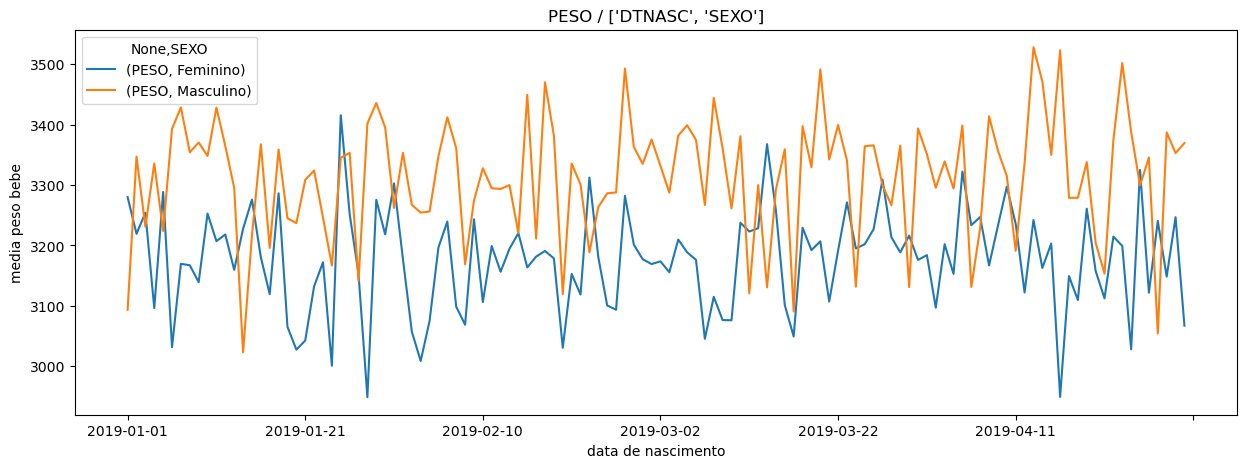

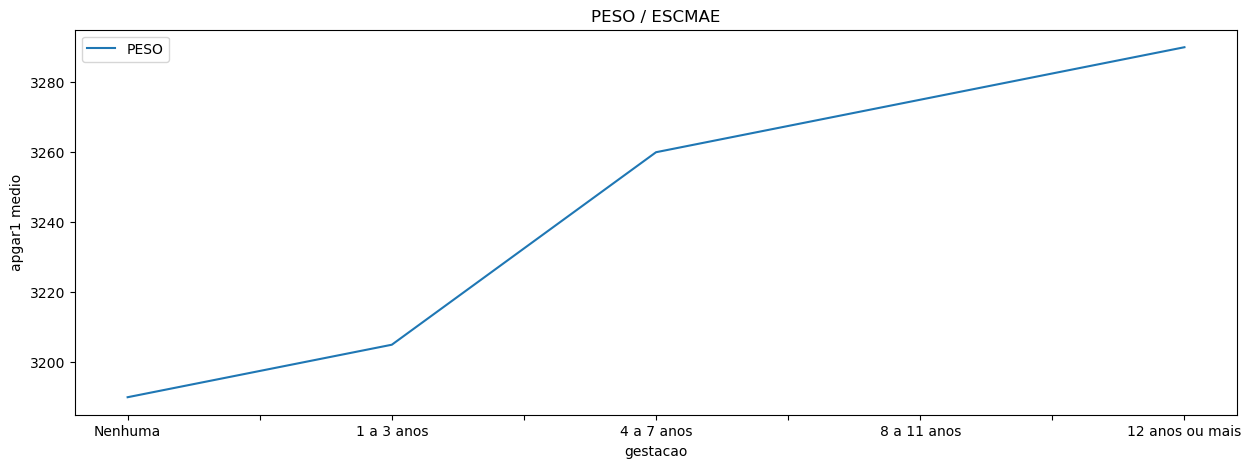

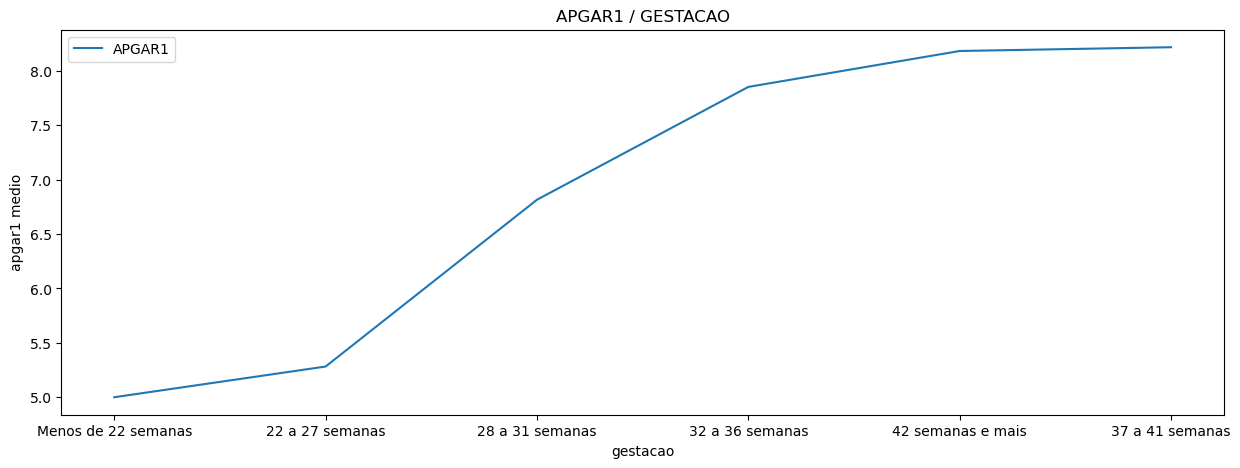

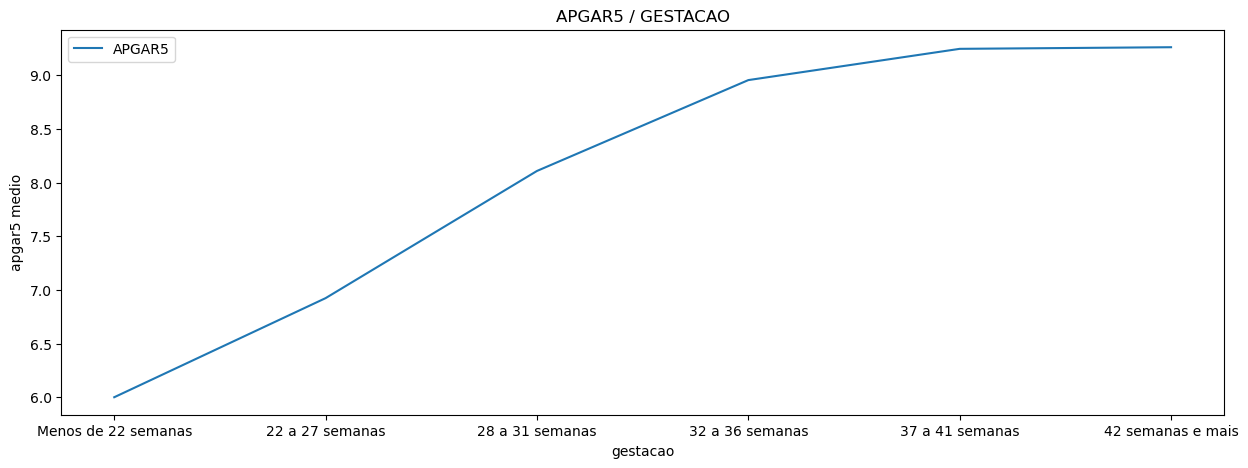

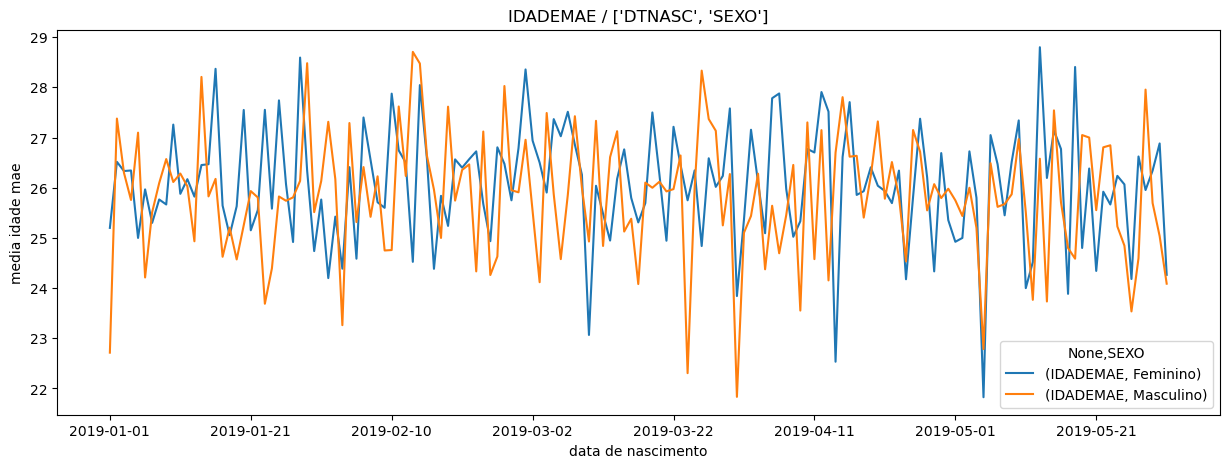

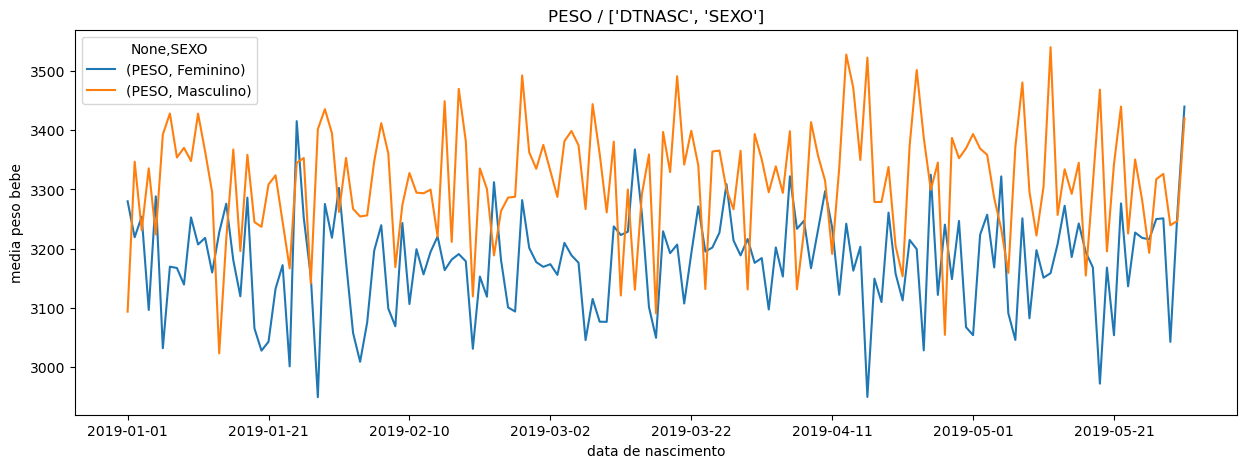

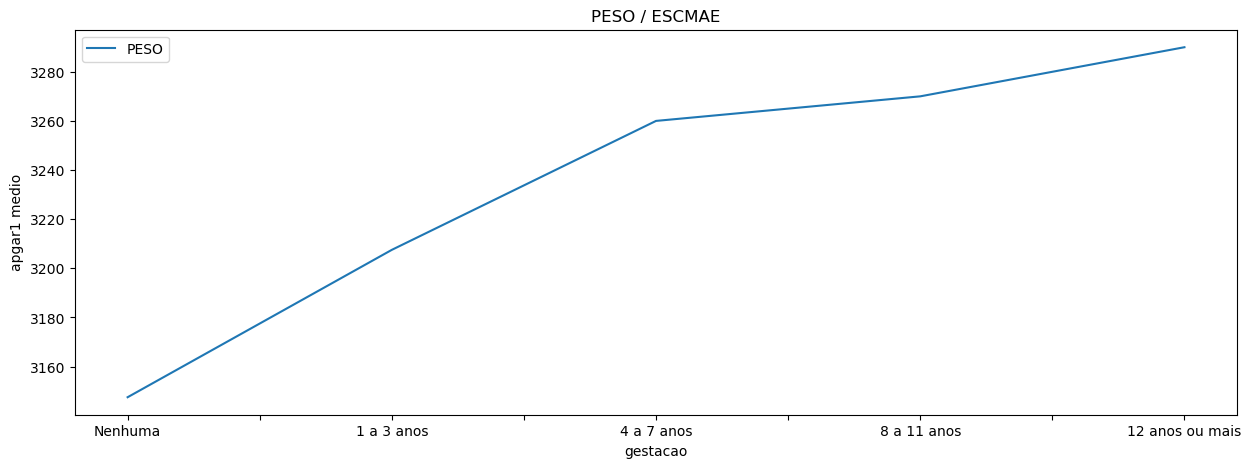

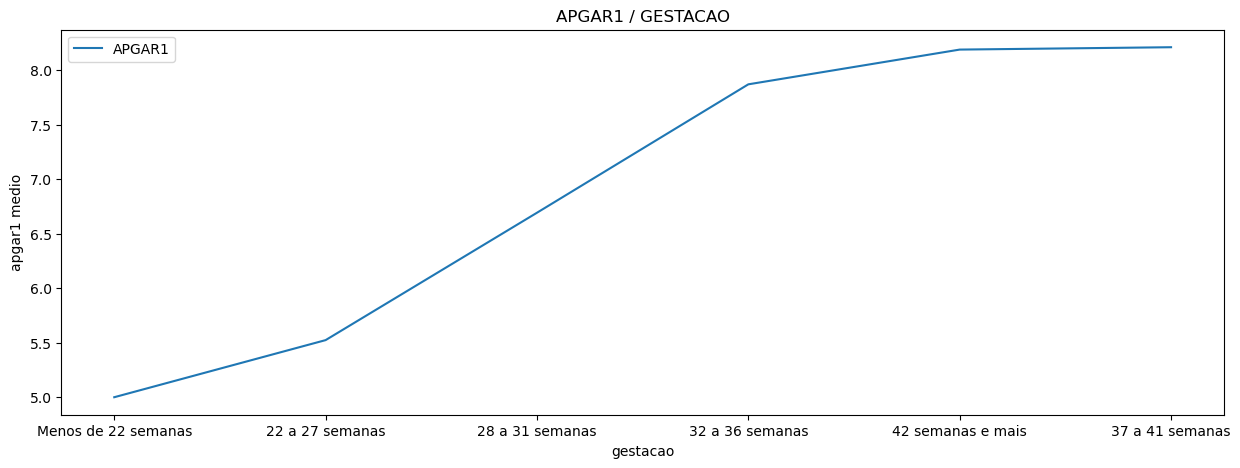

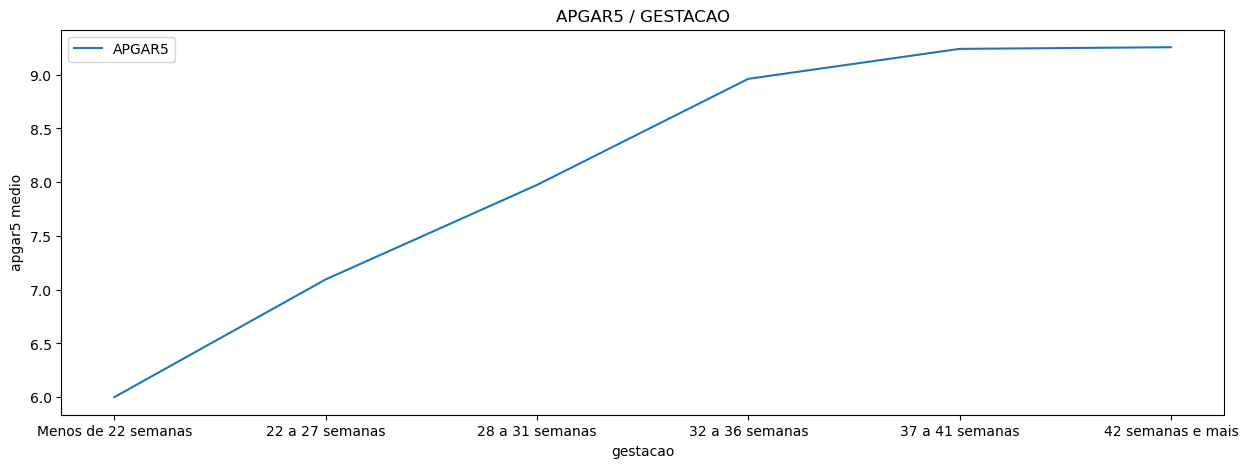

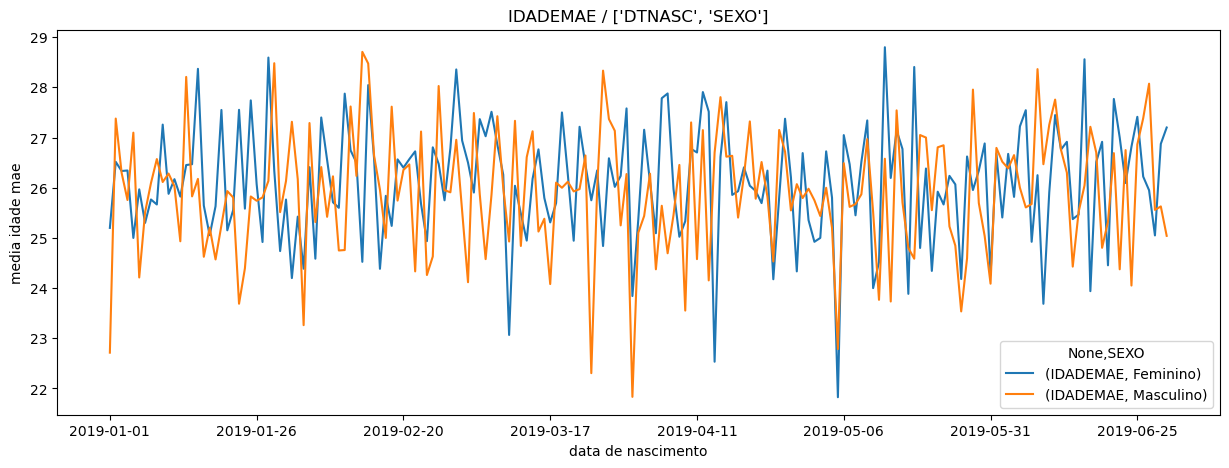

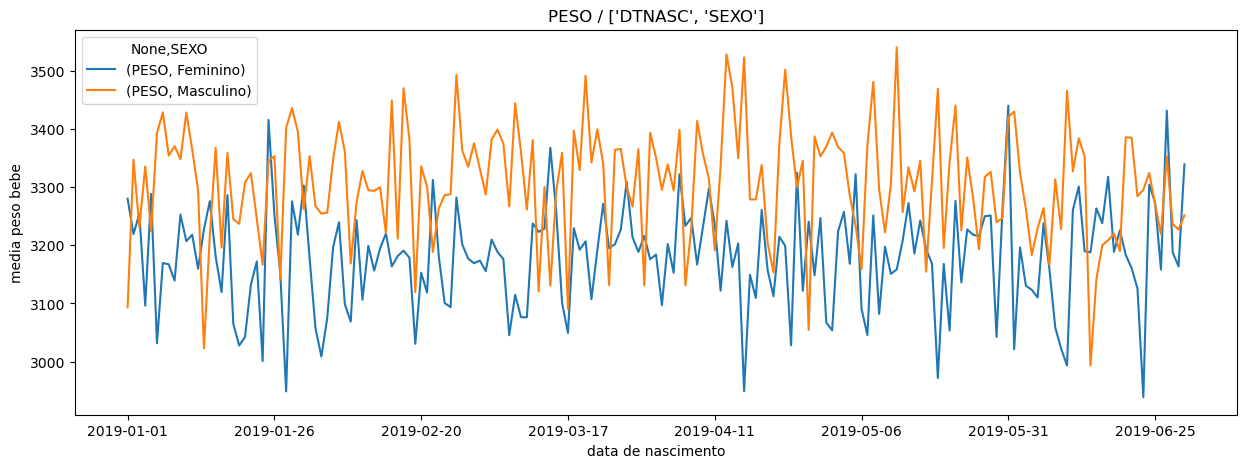

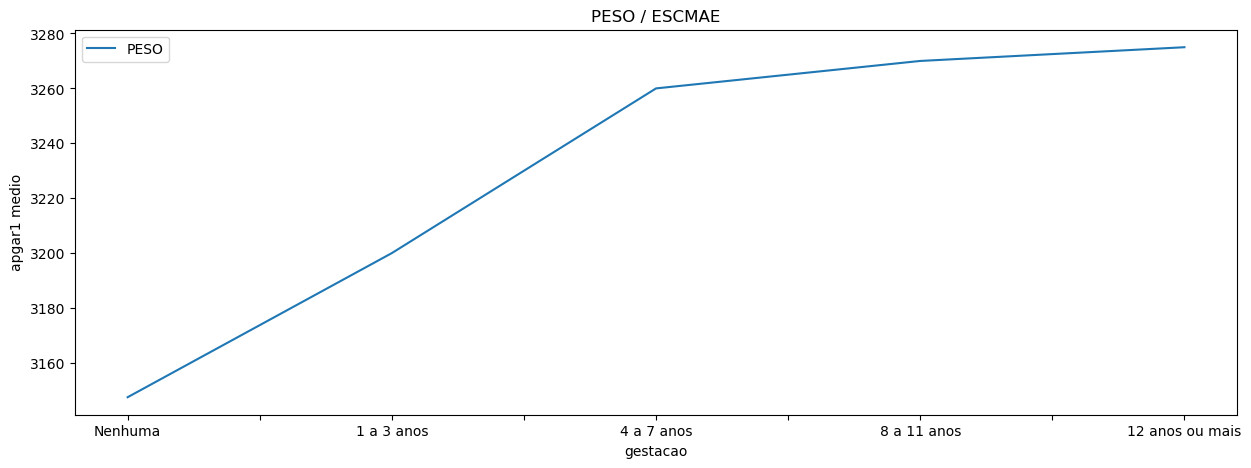

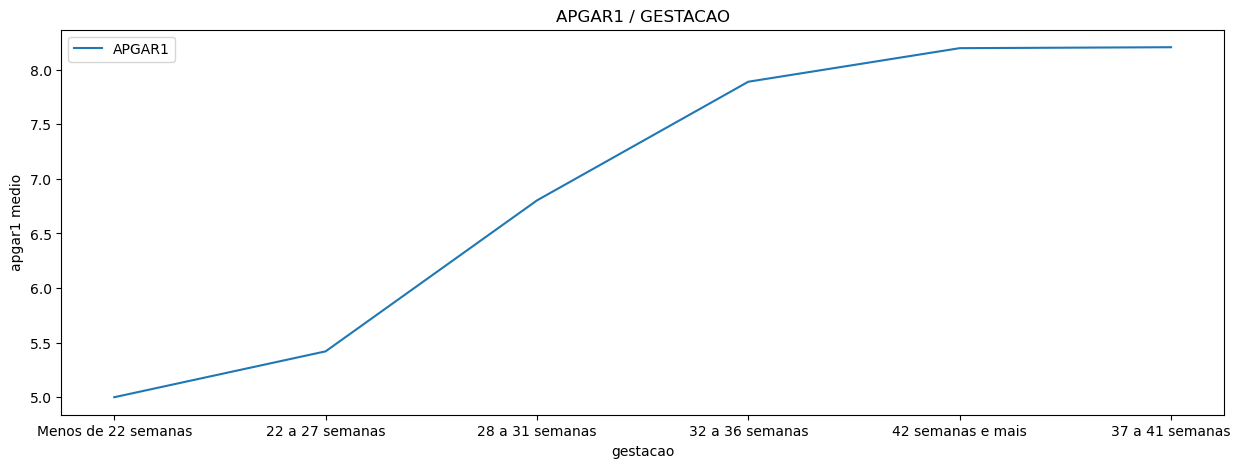

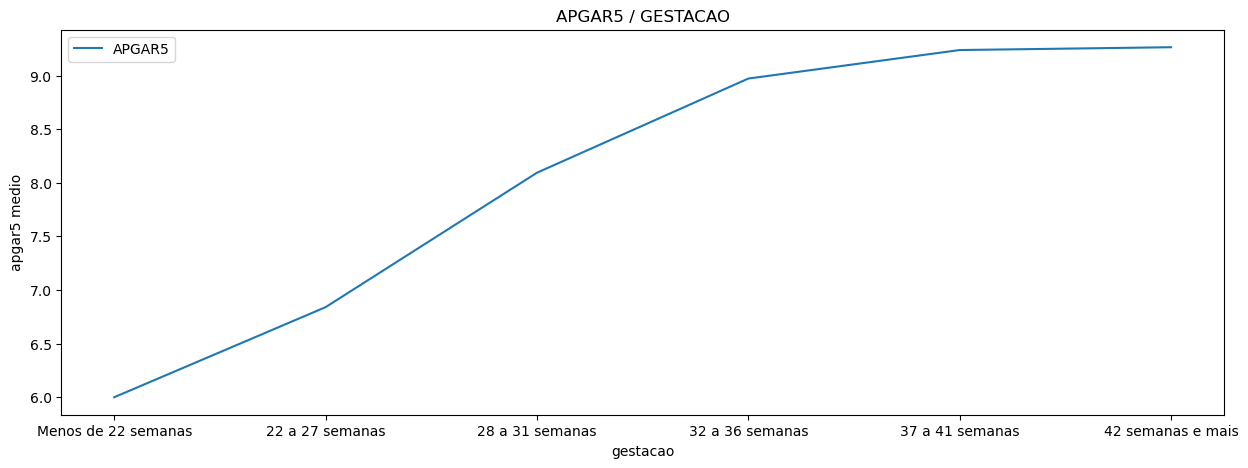

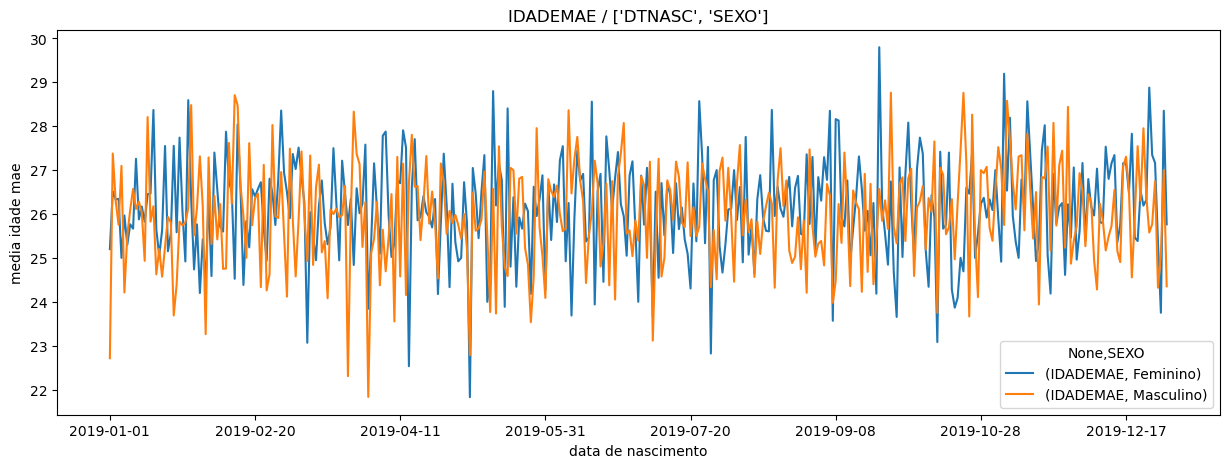

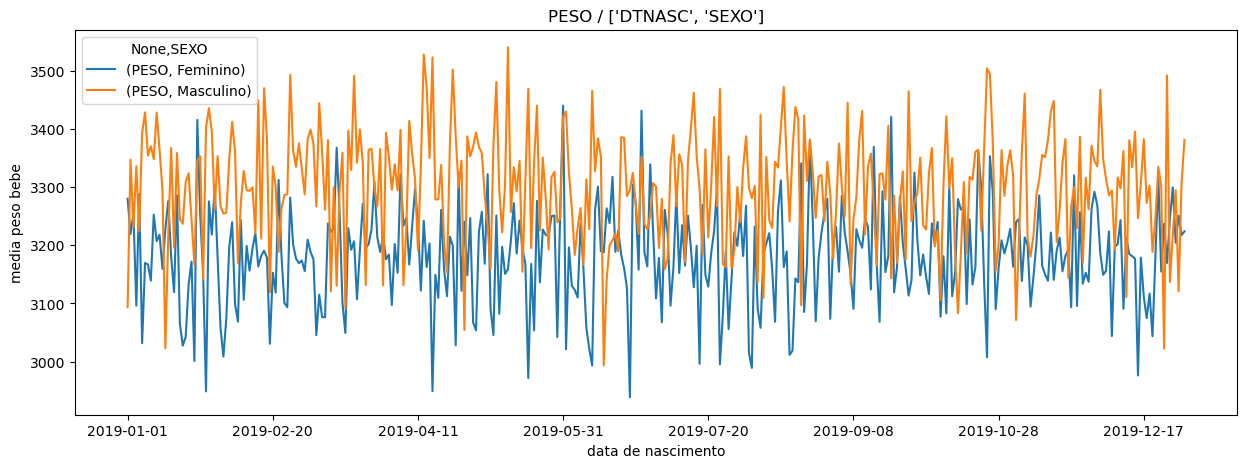

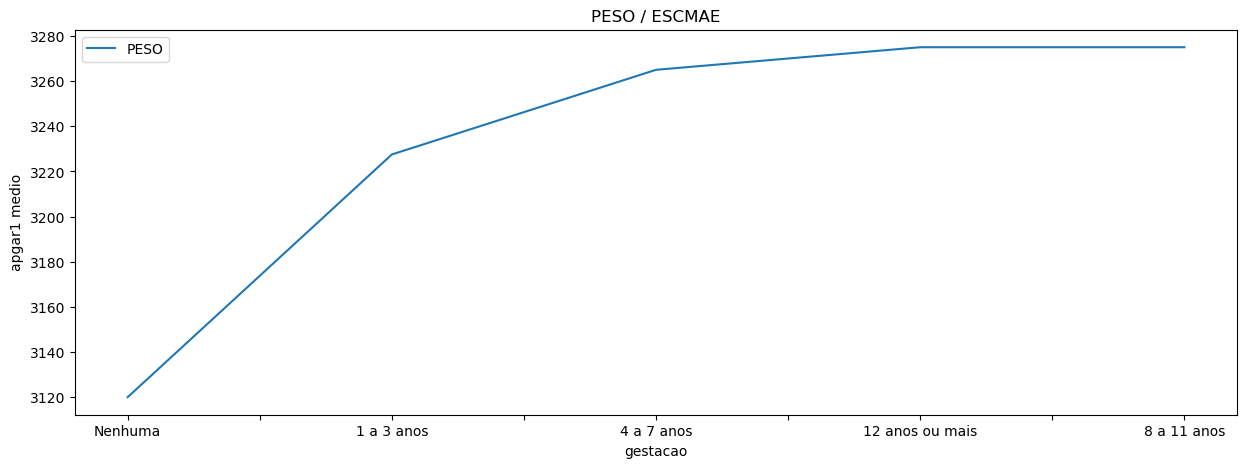

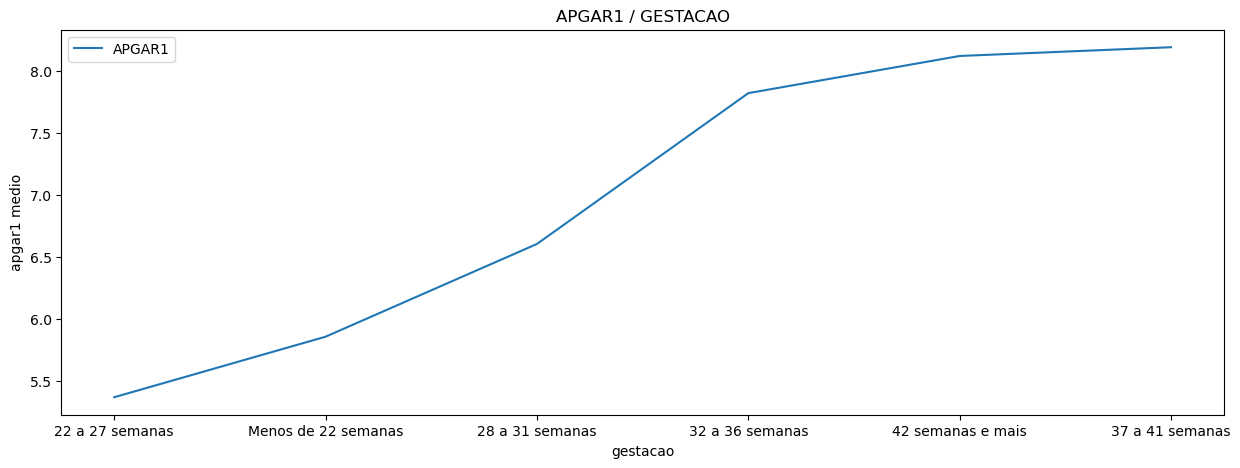

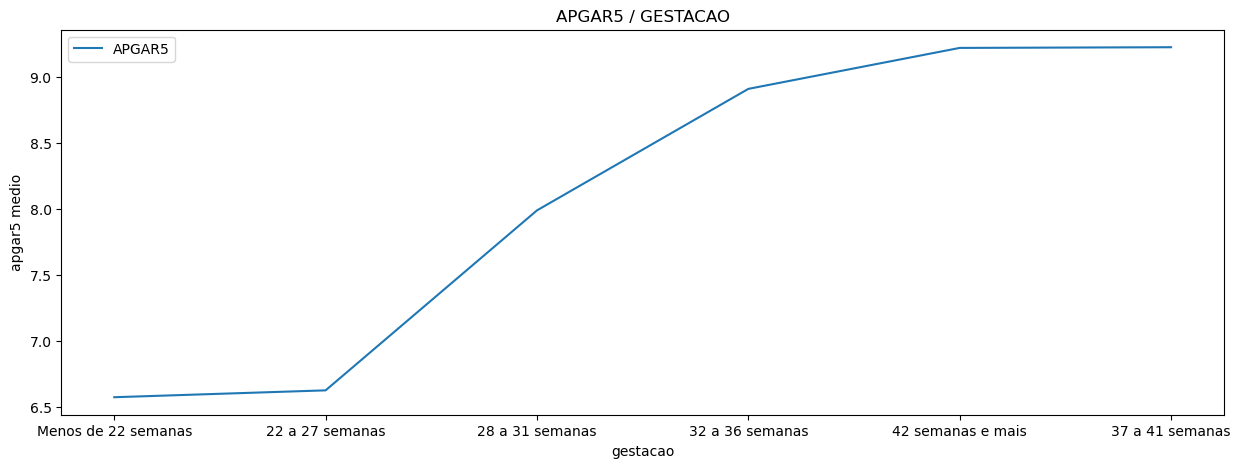

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada',titulo=''):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5],title=titulo)
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5],title=titulo)
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5],title=titulo)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

def mes_plot (data):
    max_data = data.DTNASC.max()[:7]
    os.makedirs('./output/figs/'+max_data, exist_ok=True)
    
    plota_pivot_table(data, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack',"IDADEMAE / ['DTNASC', 'SEXO']")
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    plota_pivot_table(data, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack',"PESO / ['DTNASC', 'SEXO']")
    plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

    plota_pivot_table(data, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort',"PESO / ESCMAE")
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

    plota_pivot_table(data, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort',"APGAR1 / GESTACAO")
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

    plota_pivot_table(data, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort',"APGAR5 / GESTACAO")
    plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')


#Março
sinasc_mar = pd.read_csv('./input/SINASC_RO_2019_MAR.csv')
mes_plot(sinasc_mar)
#Abril
sinasc_abr = pd.read_csv('./input/SINASC_RO_2019_ABR.csv')
mes_plot(sinasc_abr)
#Maio
sinasc_mai = pd.read_csv('./input/SINASC_RO_2019_MAI.csv')
mes_plot(sinasc_mai)
#Junho
sinasc_jun = pd.read_csv('./input/SINASC_RO_2019_JUN.csv')
mes_plot(sinasc_jun)
#Dezembro
sinasc_dez = pd.read_csv('./input/SINASC_RO_2019_DEZ.csv')
mes_plot(sinasc_dez)
    





# resposta
poderia armazenar todos os arquivos em um diretório e depois listar usando a função os.walk, poderia separar os anos por pastas

- [ano]
- - [mes.csv]

após a listagem, fazer a requisição das bases de dados para executar as função


In [140]:
#exemplo

#função que faz o plot e save
def plot_data(x):
    print(f'Plot e save com sucesso da base de dados | {x}')


#Listagem de arquivos e chama da função
for root, dirs, arquivo in os.walk('./input'):

    for x in arquivo:
        plot_data(x)


Plot e save com sucesso da base de dados | SINASC_RO_2019.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_1osemestre.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_ABR.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_AGO.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_DEZ.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_FEV.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_JAN.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_JUL.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_JUN.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_MAI.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_MAR.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_NOV.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_OUT.csv
Plot e save com sucesso da base de dados | SINASC_RO_2019_SET.csv
